<a href="https://colab.research.google.com/github/Rajat-Kumar-Pandey/MACHINE-LEARNING/blob/main/filters_and__pooling_in_convulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# Load the image
i = misc.ascent()

<ipython-input-1-410c0ac5918c>:7: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


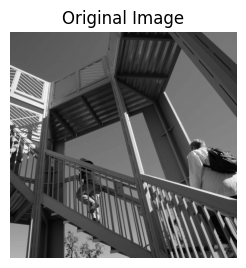

In [9]:

# Display the original image
plt.figure(figsize=(15, 10))
plt.subplot(3, 4, 1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(i, cmap='gray')


In [3]:

# Copy the image and determine its size
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [4]:

# Define filters
filters = {
    "Filter 1": [[0, 1, 0], [1, -4, 1], [0, 1, 0]],  # Edge detection
    "Filter 2": [[-1, -2, -1], [0, 0, 0], [1, 2, 1]],  # Edge detection
    "Filter 3": [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]   # Sobel edge detection
}

# Normalize weights if required
weights = {
    "Filter 1": 1,
    "Filter 2": 1,
    "Filter 3": 1
}

In [5]:

# Function to apply a filter
def apply_filter(image, filter, weight):
    transformed_image = np.copy(image)

    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            output_pixel = 0.0
            for fx in range(3):
                for fy in range(3):
                    output_pixel += image[x + fx - 1, y + fy - 1] * filter[fx][fy]
            output_pixel *= weight
            # Clipping the output pixel value
            output_pixel = max(0, min(255, output_pixel))
            transformed_image[x, y] = output_pixel

    return transformed_image


In [7]:

# Function to downsample an image
def downsample_image(image):
    size_x = image.shape[0]
    size_y = image.shape[1]
    new_x = int(size_x / 2)
    new_y = int(size_y / 2)
    new_image = np.zeros((new_x, new_y))

    for x in range(0, size_x, 2):
        for y in range(0, size_y, 2):
            pixels = []
            pixels.append(image[x, y])
            pixels.append(image[x + 1, y] if x + 1 < size_x else 0)
            pixels.append(image[x, y + 1] if y + 1 < size_y else 0)
            pixels.append(image[x + 1, y + 1] if x + 1 < size_x and y + 1 < size_y else 0)
            pixels.sort(reverse=True)
            new_image[int(x / 2), int(y / 2)] = pixels[0]

    return new_image

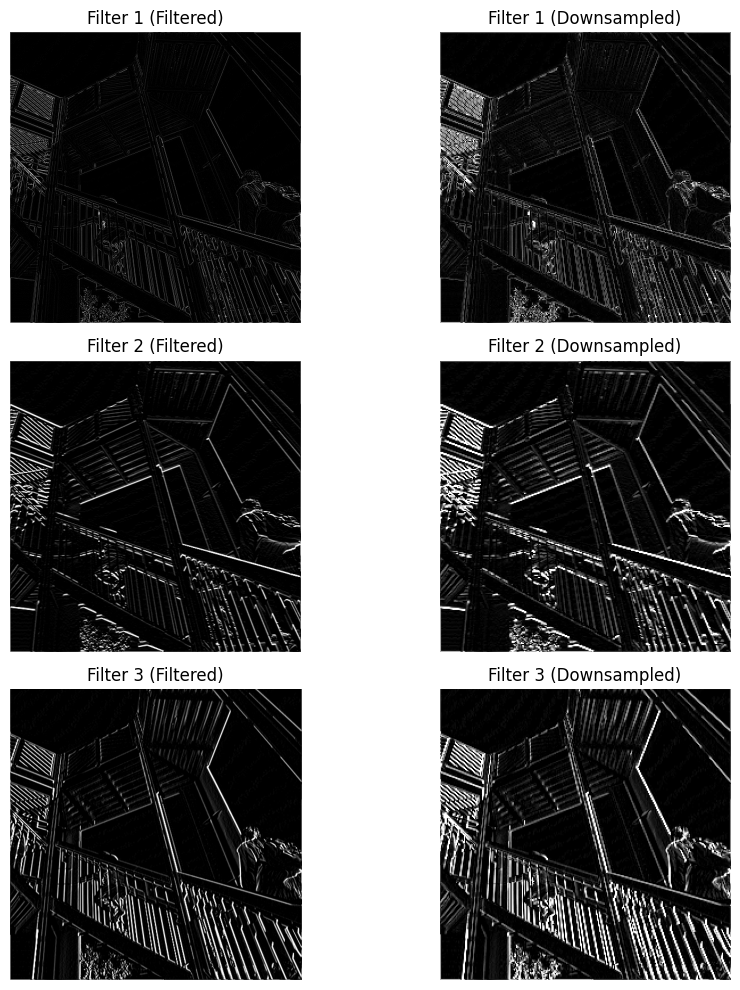

In [16]:
# Apply each filter, downsample, and display results
index = 1  # Start with the first subplot
plt.figure(figsize=(10, 10))  # Adjust figure size for better visualization

for name, filter in filters.items():
    # Apply filter
    filtered_image = apply_filter(i_transformed, filter, weights[name])

    # Plot the filtered image
    plt.subplot(3, 2, index)
    plt.title(f"{name} (Filtered)")
    plt.axis('off')
    plt.imshow(filtered_image, cmap='gray')

    # Increment index for the next subplot
    index += 1

    # Downsample the filtered image
    downsampled_image = downsample_image(filtered_image)

    # Plot the downsampled image
    plt.subplot(3, 2, index)
    plt.title(f"{name} (Downsampled)")
    plt.axis('off')
    plt.imshow(downsampled_image, cmap='gray')

    # Increment index for the next subplot
    index += 1

plt.tight_layout()
plt.show()
